In [1]:
#Run this cell to load the libraries/modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('max_colwidth', 280)

### Part 1 - Load the data

In [2]:
from os import listdir
for f in listdir("data"):
    print(f)

BillGates_tweets.txt
CRonaldo_tweets.txt
Elonmusk_tweets.txt
vader_lexicon.txt


In [3]:
with open('data/Elonmusk_tweets.txt') as f:
    elonmask = f.read(1000)
    print(elonmask)

[{"created_at": "Sat Feb 06 09:58:04 +0000 2021", "id": 1357991946082418690, "id_str": "1357991946082418690", "full_text": "The Second Last Kingdom https://t.co/Je4EI88HmV", "truncated": false, "display_text_range": [0, 23], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 1357991942471094275, "id_str": "1357991942471094275", "indices": [24, 47], "media_url": "http://pbs.twimg.com/media/EtiOegrVEAMCgZE.jpg", "media_url_https": "https://pbs.twimg.com/media/EtiOegrVEAMCgZE.jpg", "url": "https://t.co/Je4EI88HmV", "display_url": "pic.twitter.com/Je4EI88HmV", "expanded_url": "https://twitter.com/elonmusk/status/1357991946082418690/photo/1", "type": "photo", "sizes": {"large": {"w": 1512, "h": 2016, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 900, "h": 1200, "resize": "fit"}, "small": {"w": 510, "h": 680, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 1357991942471094275, "id_str": "135799194247

In [3]:
with open('data/Elonmusk_tweets.txt') as f1:
    elonmask_1 = f1.read()
    
with open('data/CRonaldo_tweets.txt') as f2:
    ronaldo = f2.read()
    
with open('data/BillGates_tweets.txt') as f3:
    billgates = f3.read()

In [4]:
from io import StringIO
tweets = {
    "Elonmusk": pd.read_json(StringIO(elonmask_1)),
    "Ronaldo": pd.read_json(StringIO(ronaldo)),
    "BillGates": pd.read_json(StringIO(billgates))
}

In [6]:
tweets["Elonmusk"]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2021-02-06 09:58:04+00:00,1357991946082418690,1357991946082418688,The Second Last Kingdom https://t.co/Je4EI88HmV,False,"[0, 23]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1357991942471094275, 'id_str': '1357991942471094275', 'indices': [24, 47], 'media_url': 'http://pbs.twimg.com/media/EtiOegrVEAMCgZE.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtiOegrV...","{'media': [{'id': 1357991942471094275, 'id_str': '1357991942471094275', 'indices': [24, 47], 'media_url': 'http://pbs.twimg.com/media/EtiOegrVEAMCgZE.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtiOegrVEAMCgZE.jpg', 'url': 'https://t.co/Je4EI88HmV', 'display_url': '...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,352096,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2021-02-06 08:45:02+00:00,1357973565413367808,1357973565413367808,@DumDin7 @Grimezsz Haven’t heard that name in years …,False,"[19, 53]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'DumDin7', 'name': 'Dum Din', 'id': 1279896279733145601, 'id_str': '1279896279733145601', 'indices': [0, 8]}, {'screen_name': 'Grimezsz', 'name': '𝑪𝒍𝒂𝒊𝒓𝒆 𝒅𝒆 𝑳𝒖𝒏𝒆࿎', 'id': 276540738, 'id_str': '276540738', 'indi...",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.357973e+18,...,2155,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
2,2021-02-06 08:42:25+00:00,1357972904663687173,1357972904663687168,@Grimezsz Dogecake,False,"[10, 18]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Grimezsz', 'name': '𝑪𝒍𝒂𝒊𝒓𝒆 𝒅𝒆 𝑳𝒖𝒏𝒆࿎', 'id': 276540738, 'id_str': '276540738', 'indices': [0, 9]}], 'urls': []}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.357835e+18,...,5373,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
3,2021-02-06 08:32:55+00:00,1357970517165182979,1357970517165182976,YOLT\n\nhttps://t.co/cnOf9yjpF1,False,"[0, 29]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/cnOf9yjpF1', 'expanded_url': 'https://m.youtube.com/watch?v=05QJlF06F4s', 'display_url': 'm.youtube.com/watch?v=05QJlF…', 'indices': [6, 29]}]}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,62717,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2021-02-06 08:08:24+00:00,1357964347813687296,1357964347813687296,@Kristennetten That’s Damian,False,"[15, 28]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Kristennetten', 'name': 'K10✨', 'id': 985686123123949568, 'id_str': '985686123123949568', 'indices': [0, 14]}], 'urls': []}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.357964e+18,...,5726,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,2020-03-25 19:46:12+00:00,1242900612897005571,1242900612897005568,@flcnhvy @Tesla Giga New York will reopen for ventilator production as soon as humanly possible. We will do anything in our power to help the citizens of New York.,False,"[16, 163]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'flcnhvy', 'name': 'Viv 🐉', 'id': 1060180551544528897, 'id_str': '1060180551544528897', 'indices': [0, 8]}, {'screen_name': 'Tesla', 'name': 'Tesla', 'id': 13298072, 'id_str': '13298072', 'indices': [9, 15]}], ...",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.242881e+18,...,7445,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
3235,2020-03-25 19:41:51+00:00,1242899515268648962,1242899515268648960,@enscand @PPathole @flcnhvy @Tesla Something weird happened at CDC yesterd

### Part 2: Source Analysis

In [6]:
tweets["Ronaldo"][["source"]]

,source
0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
3,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
4,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
...,...
3193,"<a href=""http://www.whosay.com"" rel=""nofollow"">WhoSay</a>"
3194,"<a href=""http://www.whosay.com"" rel=""nofollow"">WhoSay</a>"
3195,"<a href=""http://www.whosay.com"" rel=""nofollow"">WhoSay</a>"
3196,"<a href=""http://www.whosay.com"" rel=""nofollow"">WhoSay</a>"


In [7]:
regex = r"<[^>]+>"
sample_str = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
patterns = re.sub(regex, '', sample_str)
print(patterns)

#Make use of re.sub to replace anything that matches the pattern

Twitter for iPhone


In [8]:
regex_2 = r">(<[^>]+>|[^<]+)<"
patterns_2 = re.findall(regex_2, sample_str)[0]
print(patterns_2)

Twitter for iPhone


In [9]:
#task 2.1
#regex_pattern = r"<[^>]+>"
#tweets["Ronaldo"][["device"]] = tweets["Ronaldo"][["source"]].replace(regex_pattern, '', regex=True)
#tweets["Ronaldo"].head()

def add_device(DataFrame):
    regex_pattern = r"<[^>]+>"
    DataFrame["device"] = DataFrame["source"].replace(regex_pattern, '', regex=True)


add_device(tweets["Ronaldo"])
tweets["Ronaldo"].head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,retweeted_status,device
0,2021-02-06 19:36:43+00:00,1358137564587319299,1358137564587319296,Happy to score and help the team against a tough opponent! 3 important points! \nWell done lads 👏🏽💪🏽 #finoallafine https://t.co/bVHENpx2X6,False,"[0, 113]","{'hashtags': [{'text': 'finoallafine', 'indices': [100, 113]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1358137559772246023, 'id_str': '1358137559772246023', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/media/EtkS6jZXMAcdl-P.jpg', 'media_...","{'media': [{'id': 1358137559772246023, 'id_str': '1358137559772246023', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/media/EtkS6jZXMAcdl-P.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtkS6jZXMAcdl-P.jpg', 'url': 'https://t.co/bVHENpx2X6', 'display_url':...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone
1,2021-02-04 17:26:21+00:00,1357379984399212545,1357379984399212544,Done ⚽️💪🏽\nHave a good day!😉👊🏽 https://t.co/DN9lo4gMbS,False,"[0, 29]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1357379979147964421, 'id_str': '1357379979147964421', 'indices': [30, 53], 'media_url': 'http://pbs.twimg.com/media/EtZh5jpXcAUg0BM.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtZh5jpX...","{'media': [{'id': 1357379979147964421, 'id_str': '1357379979147964421', 'indices': [30, 53], 'media_url': 'http://pbs.twimg.com/media/EtZh5jpXcAUg0BM.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtZh5jpXcAUg0BM.jpg', 'url': 'https://t.co/DN9lo4gMbS', 'display_url': '...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone
2,2021-02-02 22:35:36+00:00,1356733030962987008,1356733030962987008,Grande vittoria di squadra! Abbiamo bisogno di questo spirito #finoallafine 🏳️🏴💪🏽 https://t.co/lNyV5hGE2n,False,"[0, 81]","{'hashtags': [{'text': 'finoallafine', 'indices': [62, 75]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1356733026261225473, 'id_str': '1356733026261225473', 'indices': [82, 105], 'media_url': 'http://pbs.twimg.com/media/EtQVf8VXUAE7nJj.jpg', 'media_url...","{'media': [{'id': 1356733026261225473, 'id_str': '1356733026261225473', 'indices': [82, 105], 'media_url': 'http://pbs.twimg.com/media/EtQVf8VXUAE7nJj.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtQVf8VXUAE7nJj.jpg', 'url': 'https://t.co/lNyV5hGE2n', 'display_url': ...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,it,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone
3,2021-01-31 17:02:22+00:00,1355924395064233986,1355924395064233984,Home sweet home! ❤️😍 https://t.co/7MaSXDfTYm,False,"[0, 20]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1355924390752505857, 'id_str': '1355924390752505857', 'indices': [21, 44], 'media_url': 'http://pbs.twimg.com/media/EtE2DKUXUAE0tyN.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtE2DKUX...","{'media': [{'id': 1355924390752505857, 'id_str': '1355924390752505857', 'indices': [21, 44], 'media_url': 'http://pbs.twimg.com/media/EtE2DKUXUAE0tyN.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtE2DKUXUAE0tyN.jpg', 'url': 'https://t.co/7MaSXDfTYm', 'display_url': '...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone
4,2021-01-30 19:30:37+00:00,1355599316300292097,1355599316300292096,Altri 3 punti importantissimi ! Avanti così 🏳️🏴💪🏽 #finoallafine https://t.co/l5HfUkfLcS,False,"[0, 63]","{'ha

In [10]:
def k_most_frequent(series, k=10):
    top_k = series.value_counts()[:k]
    return top_k
    
k_most_frequent(tweets['Ronaldo']['device'])

Twitter for iPhone              1183
Twitter Web Client               959
WhoSay                           453
MobioINsider.com                 144
Twitter for Android              108
Twitter for iPad                  92
Twitter Media Studio              79
10 - Sport Through Your Lens      52
Instagram                         40
Twitter Web App                   28
Name: device, dtype: int64

In [11]:
add_device(tweets['Elonmusk'])
add_device(tweets['BillGates'])

#Ron = k_most_frequent(tweets['Ronaldo']['device']).to_frame()
#Ron.rename(columns = {'device':'Ronaldo'}, inplace = True)
#Ron

def device_counting(name):
    name_list = ['BillGates', 'Elonmusk', 'Ronaldo']
    if name in name_list:
        k = k_most_frequent(tweets[name]['device']).to_frame()
        k.rename(columns = {'device':name}, inplace = True)
    return k


df1 = device_counting('Ronaldo').T
df2 = device_counting('Elonmusk').T
df3 = device_counting('BillGates').T

from functools import reduce

dfs = [df1, df2, df3]

device_counts = reduce(lambda  left,right: pd.merge(left,right,
                                            how='outer'), dfs)

device_counts = device_counts.fillna(0)

device_counts.rename(index = {0:'Ronaldo', 1:'Elonmusk', 2:'BillGates'}, inplace = True)

device_counts


,Twitter for iPhone,Twitter Web Client,WhoSay,MobioINsider.com,Twitter for Android,Twitter for iPad,Twitter Media Studio,10 - Sport Through Your Lens,Instagram,Twitter Web App,Hootsuite,Sprinklr,Twitter for Windows,Twitter for Windows Phone,Twitter Ads,Twitter for Websites
Ronaldo,1183.0,959.0,453.0,144.0,108.0,92.0,79.0,52.0,40.0,28,0.0,0.0,0.0,0.0,0.0,0.0
Elonmusk,3202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37,0.0,0.0,0.0,0.0,0.0,0.0
BillGates,0.0,897.0,0.0,0.0,7.0,0.0,138.0,0.0,0.0,205,907.0,882.0,89.0,51.0,8.0,8.0


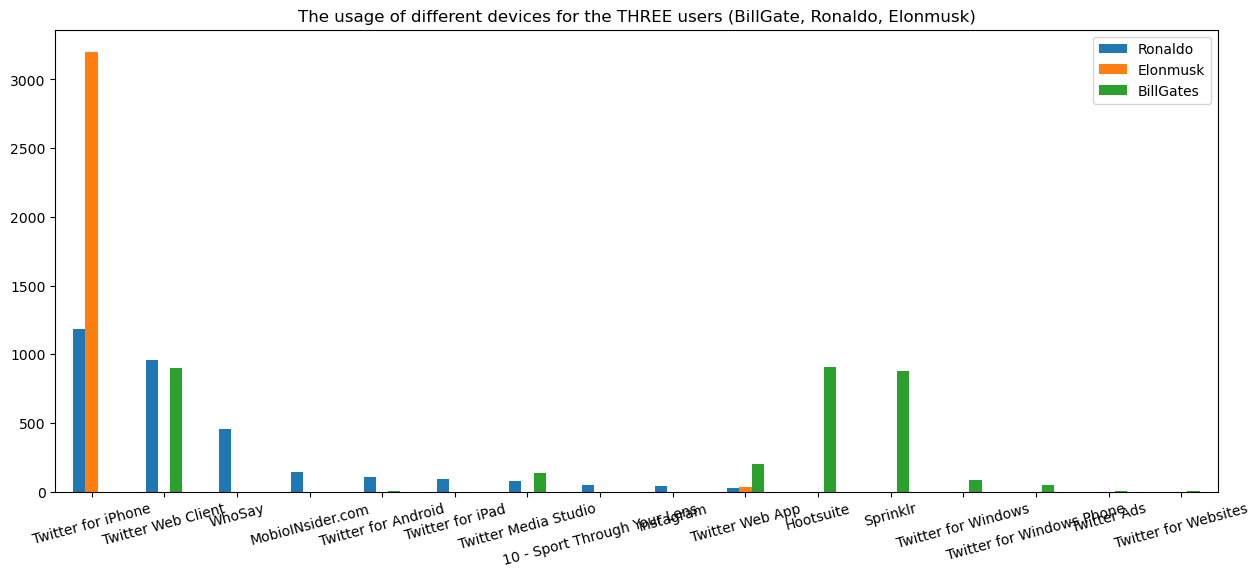

In [14]:
import matplotlib.pyplot as plot

device_counts = device_counts.T
device_counts.plot.bar(rot=15, title="The usage of different devices for the THREE users (BillGate, Ronaldo, Elonmusk)",figsize=(15, 6));

plot.show(block=True);

### Part 3: Time Series Analysis

In [10]:
def add_hour_of_the_day(df, time_col, result_col):
    pattern = r"(\d+):(\d+):(\d+)+"
    time = df[time_col].astype(str).str.findall(pattern)
    #hour = time[0] + (time[1]/60) + (time[2]/60**2)
    #df[result_col] = hour
    time_list = []
    for i in time:
        hour = int(i[0][0]) + (int(i[0][1])/60) + (int(i[0][2])/60**2)
        time_list.append(hour)
    df[result_col] = time_list
    
    
    
    
    return df

tweets = {key: add_hour_of_the_day(df, "created_at", "hour") for key, df in tweets.items()}
tweets['Ronaldo'].head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,retweeted_status,device,hour
0,2021-02-06 19:36:43+00:00,1358137564587319299,1358137564587319296,Happy to score and help the team against a tough opponent! 3 important points! \nWell done lads 👏🏽💪🏽 #finoallafine https://t.co/bVHENpx2X6,False,"[0, 113]","{'hashtags': [{'text': 'finoallafine', 'indices': [100, 113]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1358137559772246023, 'id_str': '1358137559772246023', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/media/EtkS6jZXMAcdl-P.jpg', 'media_...","{'media': [{'id': 1358137559772246023, 'id_str': '1358137559772246023', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/media/EtkS6jZXMAcdl-P.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtkS6jZXMAcdl-P.jpg', 'url': 'https://t.co/bVHENpx2X6', 'display_url':...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,19.611944
1,2021-02-04 17:26:21+00:00,1357379984399212545,1357379984399212544,Done ⚽️💪🏽\nHave a good day!😉👊🏽 https://t.co/DN9lo4gMbS,False,"[0, 29]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1357379979147964421, 'id_str': '1357379979147964421', 'indices': [30, 53], 'media_url': 'http://pbs.twimg.com/media/EtZh5jpXcAUg0BM.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtZh5jpX...","{'media': [{'id': 1357379979147964421, 'id_str': '1357379979147964421', 'indices': [30, 53], 'media_url': 'http://pbs.twimg.com/media/EtZh5jpXcAUg0BM.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtZh5jpXcAUg0BM.jpg', 'url': 'https://t.co/DN9lo4gMbS', 'display_url': '...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,17.439167
2,2021-02-02 22:35:36+00:00,1356733030962987008,1356733030962987008,Grande vittoria di squadra! Abbiamo bisogno di questo spirito #finoallafine 🏳️🏴💪🏽 https://t.co/lNyV5hGE2n,False,"[0, 81]","{'hashtags': [{'text': 'finoallafine', 'indices': [62, 75]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1356733026261225473, 'id_str': '1356733026261225473', 'indices': [82, 105], 'media_url': 'http://pbs.twimg.com/media/EtQVf8VXUAE7nJj.jpg', 'media_url...","{'media': [{'id': 1356733026261225473, 'id_str': '1356733026261225473', 'indices': [82, 105], 'media_url': 'http://pbs.twimg.com/media/EtQVf8VXUAE7nJj.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtQVf8VXUAE7nJj.jpg', 'url': 'https://t.co/lNyV5hGE2n', 'display_url': ...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,0.0,it,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,22.593333
3,2021-01-31 17:02:22+00:00,1355924395064233986,1355924395064233984,Home sweet home! ❤️😍 https://t.co/7MaSXDfTYm,False,"[0, 20]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1355924390752505857, 'id_str': '1355924390752505857', 'indices': [21, 44], 'media_url': 'http://pbs.twimg.com/media/EtE2DKUXUAE0tyN.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtE2DKUX...","{'media': [{'id': 1355924390752505857, 'id_str': '1355924390752505857', 'indices': [21, 44], 'media_url': 'http://pbs.twimg.com/media/EtE2DKUXUAE0tyN.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtE2DKUXUAE0tyN.jpg', 'url': 'https://t.co/7MaSXDfTYm', 'display_url': '...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,17.039444
4,2021-01-30 19:30:37+00:00,1355599316300292097,1355599316300292096,Altri 3 punti importantissimi ! Avanti così 🏳️🏴💪🏽 #finoallafine https://t.co/l5HfUkfLcS,False,"[0,

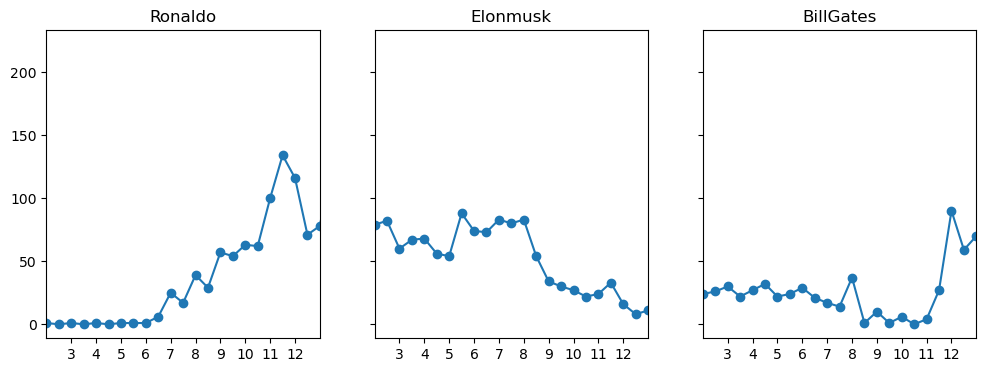

In [11]:
# run this cell
def bin_df(df, bins, colname):
    binned = pd.cut(df[colname], bins).value_counts().sort_index()
    return pd.DataFrame({"counts": binned, "bin": bins[:-1]})


def line_and_points(data, ax, title):
    # assumes single year, hence Mo
    ax.plot('bin', 'counts', data=data)
    ax.scatter('bin', 'counts', data=data)
    ax.set_xlim(2, 13)
    ax.set_title(title)
    ax.set_xticks(np.arange(3, 13))

hour_bins = np.arange(0, 24.5, .5)
binned_hours = {handle: bin_df(df, hour_bins, "hour") for handle, df in tweets.items()}

fig, axes = plt.subplots(ncols = 3, figsize=(12, 4), sharey=True)    

line_and_points(binned_hours['Ronaldo'], axes[0], 
                title="Ronaldo")

line_and_points(binned_hours['Elonmusk'], axes[1], 
                title="Elonmusk")

line_and_points(binned_hours['BillGates'], axes[2], 
                title="BillGates")

In [14]:
tweets["Ronaldo"].dtypes

created_at                   datetime64[ns, UTC]
id                                         int64
id_str                                     int64
full_text                                 object
truncated                                   bool
display_text_range                        object
entities                                  object
extended_entities                         object
source                                    object
in_reply_to_status_id                    float64
in_reply_to_status_id_str                float64
in_reply_to_user_id                      float64
in_reply_to_user_id_str                  float64
in_reply_to_screen_name                   object
user                                      object
geo                                      float64
coordinates                              float64
place                                     object
contributors                             float64
is_quote_status                             bool
retweet_count       

In [12]:
#similar idea but no idea with the time of timezone
def convert_timezone(df, newTs):
    #df["converted_time"] = df["created_at"].tz_localize(newTs)
    df["converted_time"] = pd.to_datetime(df["created_at"],unit='ms', utc=True).dt.tz_convert(newTs)
    return df

timezones = {"BillGates": "America/Los_Angeles", "Ronaldo": "Asia/Riyadh", "elonmusk": "America/Los_Angeles"}
tweets = {handle: convert_timezone(df, tz) for (handle, df), tz in zip(tweets.items(), timezones.values())}

tweets["Ronaldo"]["converted_time"]

0      2021-02-06 22:36:43+03:00
1      2021-02-04 20:26:21+03:00
2      2021-02-03 01:35:36+03:00
3      2021-01-31 20:02:22+03:00
4      2021-01-30 22:30:37+03:00
                  ...           
3193   2011-02-01 22:05:26+03:00
3194   2011-02-01 22:00:22+03:00
3195   2011-02-01 21:53:17+03:00
3196   2011-02-01 21:47:12+03:00
3197   2011-02-01 21:41:04+03:00
Name: converted_time, Length: 3198, dtype: datetime64[ns, Asia/Riyadh]

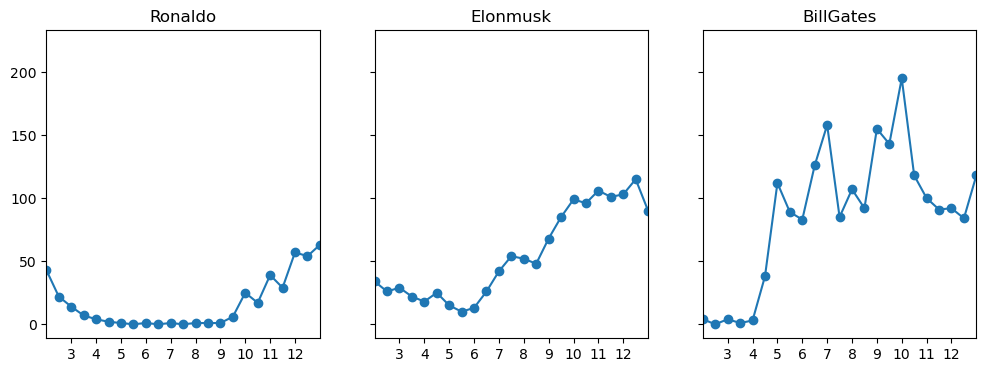

In [13]:
#tweets = {handle: convert_timezone(df, "converted_time", "converted_hour") for handle, df in tweets.items()}
#timezones = {"BillGates": "America/Los_Angeles", "Ronaldo": "Asia/Riyadh", "elonmusk": "America/Los_Angeles"}
#time = {"America/Los_Angeles" : 0, "Asia/Riyadh" : 1, "America/Los_Angeles" : 2}
tweets = {key: add_hour_of_the_day(df, "converted_time", "converted_hour") for key, df in tweets.items()}

def bin_df(df, bins, colname):
    binned = pd.cut(df[colname], bins).value_counts().sort_index()
    return pd.DataFrame({"counts": binned, "bin": bins[:-1]})

tweets = {handle: convert_timezone(df, tz) for (handle, df), tz in zip(tweets.items(), timezones.values())}
binned_hours = {handle: bin_df(df, hour_bins, "converted_hour") for handle, df in tweets.items()}

fig, axes = plt.subplots(ncols = 3, figsize=(12, 4), sharey=True)    

line_and_points(binned_hours['Ronaldo'], axes[0], 
                title="Ronaldo")

line_and_points(binned_hours['Elonmusk'], axes[1], 
                title="Elonmusk")

line_and_points(binned_hours['BillGates'], axes[2], 
                title="BillGates")

### Part 4: Sentiment Analysis

In [5]:
print(''.join(open("data/vader_lexicon.txt", encoding="utf-8").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



In [6]:
sen = pd.read_csv("data/vader_lexicon.txt",delimiter="\t", names=['token', 'polarity', 'none1', 'none2'])
sentiment = pd.DataFrame(sen.iloc[:, :2])
sentiment

,token,polarity
0,$:,-1.5
1,%),-0.4
2,%-),-1.5
3,&-:,-0.4
4,&:,-0.7
...,...,...
7512,}:,-2.1
7513,}:(,-2.0
7514,}:),0.4
7515,}:-(,-2.1


In [7]:
punct_re = r"[^\w|^\s]"
text = "Done ⚽️💪🏽\nHave a good day!😉👊🏽 https://t.co/DN9lo4gMbS"
patterns_2 = re.findall(punct_re, text)
print(patterns_2)

['⚽', '️', '💪', '🏽', '!', '😉', '👊', '🏽', ':', '/', '/', '.', '/']


In [8]:
mentions_re = r"@(\w+|[^\s])"
text = "@   "
patterns_2 = re.findall(mentions_re, text)
print(patterns_2)

[]


In [9]:
def sanitize_texts(df):
    punct_re = r"[^\w|^\s]"
    df["clean_text"] = df["full_text"].replace(punct_re, '', regex=True)
    return df

tweets = {handle: sanitize_texts(df) for handle, df in tweets.items()}
tweets["Elonmusk"]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,clean_text
0,2021-02-06 09:58:04+00:00,1357991946082418690,1357991946082418688,The Second Last Kingdom https://t.co/Je4EI88HmV,False,"[0, 23]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1357991942471094275, 'id_str': '1357991942471094275', 'indices': [24, 47], 'media_url': 'http://pbs.twimg.com/media/EtiOegrVEAMCgZE.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtiOegrV...","{'media': [{'id': 1357991942471094275, 'id_str': '1357991942471094275', 'indices': [24, 47], 'media_url': 'http://pbs.twimg.com/media/EtiOegrVEAMCgZE.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtiOegrVEAMCgZE.jpg', 'url': 'https://t.co/Je4EI88HmV', 'display_url': '...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,The Second Last Kingdom httpstcoJe4EI88HmV
1,2021-02-06 08:45:02+00:00,1357973565413367808,1357973565413367808,@DumDin7 @Grimezsz Haven’t heard that name in years …,False,"[19, 53]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'DumDin7', 'name': 'Dum Din', 'id': 1279896279733145601, 'id_str': '1279896279733145601', 'indices': [0, 8]}, {'screen_name': 'Grimezsz', 'name': '𝑪𝒍𝒂𝒊𝒓𝒆 𝒅𝒆 𝑳𝒖𝒏𝒆࿎', 'id': 276540738, 'id_str': '276540738', 'indi...",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.357973e+18,...,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,DumDin7 Grimezsz Havent heard that name in years
2,2021-02-06 08:42:25+00:00,1357972904663687173,1357972904663687168,@Grimezsz Dogecake,False,"[10, 18]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Grimezsz', 'name': '𝑪𝒍𝒂𝒊𝒓𝒆 𝒅𝒆 𝑳𝒖𝒏𝒆࿎', 'id': 276540738, 'id_str': '276540738', 'indices': [0, 9]}], 'urls': []}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.357835e+18,...,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,Grimezsz Dogecake
3,2021-02-06 08:32:55+00:00,1357970517165182979,1357970517165182976,YOLT\n\nhttps://t.co/cnOf9yjpF1,False,"[0, 29]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/cnOf9yjpF1', 'expanded_url': 'https://m.youtube.com/watch?v=05QJlF06F4s', 'display_url': 'm.youtube.com/watch?v=05QJlF…', 'indices': [6, 29]}]}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN,YOLT\n\nhttpstcocnOf9yjpF1
4,2021-02-06 08:08:24+00:00,1357964347813687296,1357964347813687296,@Kristennetten That’s Damian,False,"[15, 28]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Kristennetten', 'name': 'K10✨', 'id': 985686123123949568, 'id_str': '985686123123949568', 'indices': [0, 14]}], 'urls': []}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.357964e+18,...,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,Kristennetten Thats Damian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,2020-03-25 19:46:12+00:00,1242900612897005571,1242900612897005568,@flcnhvy @Tesla Giga New York will reopen for ventilator production as soon as humanly possible. We will do anything in our power to help the citizens of New York.,False,"[16, 163]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'flcnhvy', 'name': 'Viv 🐉', 'id': 1060180551544528897, 'id_str': '1060180551544528897', 'indices': [0, 8]}, {'screen_name': 'Tesla', 'name': 'Tesla', 'id': 13298072, 'id_str': '13298072', 'indices': [9, 15]}], ...",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.242881e+18,...,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,flcnhvy Tesla Giga

In [21]:
#fianllize
def horiz_concat_df(dict_of_df, head=None):
    #Horizontally concatenante multiple DataFrames for easier visualization. 
    #Each DataFrame must have the same columns.

    df = pd.concat([df.reset_index(drop=True) for df in dict_of_df.values()], axis=1, keys=dict_of_df.keys())
    if head is None:
        return df
    return df.head(head)

def extract_mentions(full_texts):
    mentions_re = r"@(\w+|[^\s])"
    mentions = full_texts.str.lower().str.findall(mentions_re).explode().to_frame().rename(columns={"full_text": "mentions"})
    #mentions["ind"] = mentions.index
    return mentions[['mentions']]

# # do not modify the below code
mentions = {handle: extract_mentions(df["full_text"]) for handle, df in tweets.items()}
horiz_concat_df(mentions)

,Elonmusk,Ronaldo,BillGates
,mentions,mentions,mentions
0,NaN,NaN,melindagates
1,dumdin7,NaN,codeorg
2,grimezsz,NaN,rajpanjabi
3,grimezsz,NaN,potus
4,NaN,NaN,NaN
...,...,...,...
6230,ppathole,NaN,NaN
6231,flcnhvy,NaN,NaN
6232,tesla,NaN,NaN


In [150]:
def to_tidy_format(df):
    tidy = (
        df["clean_text"]
        .str.lower()
        .str.split()
        .explode()
        .to_frame()
        .rename(columns={"clean_text": "word"})
    )
    return tidy

tidy_tweets = {handle: to_tidy_format(df) for handle, df in tweets.items()}
tidy_tweets["Elonmusk"]

,word
index,
0,the
0,second
0,last
0,kingdom
0,httpstcoje4ei88hmv
...,...
3238,help
3238,in
3238,these


In [151]:
# sentiments
#31Mar2023 11:31 fianllized ok
tidy_tweets["Ronaldo"]
def add_sum_polarity(tidy_df, df):
    mapping = dict(sentiment[['token', 'polarity']].values)
    tidy_df['polarity'] = tidy_df.word.map(mapping)
    tidy_df = tidy_df.fillna(0)
    tidy_df = tidy_df.rename_axis(columns="index")
    new_tidy_df = tidy_df.groupby('index')[['polarity']].agg(sum)
    df = df.rename_axis(columns="index")
    df['polarity'] = new_tidy_df['polarity']
    #mapping_2 = dict(new_tidy_df[['index', 'polarity']].values)
    #df['polarity'] = tidy_df.index.map(mapping_2)
    return df

tweets = {handle: add_sum_polarity(tidy_df, df) for (handle, df), tidy_df in \
          zip(tweets.items(), tidy_tweets.values())}

#add_sum_polarity(tidy_tweets["Ronaldo"])

In [152]:
tweets["Ronaldo"]

index,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,retweeted_status,clean_text,polarity
index,,,,,,,,,,,,,,,,,,,,,
0,2021-02-06 19:36:43+00:00,0,1358137564587319296,Happy to score and help the team against a tough opponent! 3 important points! \nWell done lads 👏🏽💪🏽 #finoallafine https://t.co/bVHENpx2X6,False,"[0, 113]","{'hashtags': [{'text': 'finoallafine', 'indices': [100, 113]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1358137559772246023, 'id_str': '1358137559772246023', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/media/EtkS6jZXMAcdl-P.jpg', 'media_...","{'media': [{'id': 1358137559772246023, 'id_str': '1358137559772246023', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/media/EtkS6jZXMAcdl-P.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtkS6jZXMAcdl-P.jpg', 'url': 'https://t.co/bVHENpx2X6', 'display_url':...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,Happy to score and help the team against a tough opponent 3 important points \nWell done lads finoallafine httpstcobVHENpx2X6,5.8
1,2021-02-04 17:26:21+00:00,1,1357379984399212544,Done ⚽️💪🏽\nHave a good day!😉👊🏽 https://t.co/DN9lo4gMbS,False,"[0, 29]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1357379979147964421, 'id_str': '1357379979147964421', 'indices': [30, 53], 'media_url': 'http://pbs.twimg.com/media/EtZh5jpXcAUg0BM.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtZh5jpX...","{'media': [{'id': 1357379979147964421, 'id_str': '1357379979147964421', 'indices': [30, 53], 'media_url': 'http://pbs.twimg.com/media/EtZh5jpXcAUg0BM.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtZh5jpXcAUg0BM.jpg', 'url': 'https://t.co/DN9lo4gMbS', 'display_url': '...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,Done \nHave a good day httpstcoDN9lo4gMbS,1.9
2,2021-02-02 22:35:36+00:00,2,1356733030962987008,Grande vittoria di squadra! Abbiamo bisogno di questo spirito #finoallafine 🏳️🏴💪🏽 https://t.co/lNyV5hGE2n,False,"[0, 81]","{'hashtags': [{'text': 'finoallafine', 'indices': [62, 75]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1356733026261225473, 'id_str': '1356733026261225473', 'indices': [82, 105], 'media_url': 'http://pbs.twimg.com/media/EtQVf8VXUAE7nJj.jpg', 'media_url...","{'media': [{'id': 1356733026261225473, 'id_str': '1356733026261225473', 'indices': [82, 105], 'media_url': 'http://pbs.twimg.com/media/EtQVf8VXUAE7nJj.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtQVf8VXUAE7nJj.jpg', 'url': 'https://t.co/lNyV5hGE2n', 'display_url': ...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,0.0,it,NaN,NaN,NaN,NaN,NaN,Grande vittoria di squadra Abbiamo bisogno di questo spirito finoallafine httpstcolNyV5hGE2n,0.0
3,2021-01-31 17:02:22+00:00,3,1355924395064233984,Home sweet home! ❤️😍 https://t.co/7MaSXDfTYm,False,"[0, 20]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1355924390752505857, 'id_str': '1355924390752505857', 'indices': [21, 44], 'media_url': 'http://pbs.twimg.com/media/EtE2DKUXUAE0tyN.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtE2DKUX...","{'media': [{'id': 1355924390752505857, 'id_str': '1355924390752505857', 'indices': [21, 44], 'media_url': 'http://pbs.twimg.com/media/EtE2DKUXUAE0tyN.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtE2DKUXUAE0tyN.jpg', 'url': 'https://t.co/7MaSXDfTYm', 'display_url': '...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,0.0,en,NaN,NaN,NaN,NaN,NaN,Home sweet home httpstco7MaSXDfTYm,2.0
4,

In [153]:
def mention_polarity(df, mention_df):
    df['id'] = df.index
    mention_df['id'] = mention_df.index
    mapping = dict(df[['id', 'polarity']].values)
    mention_df['polarity'] = mention_df.id.map(mapping)
    mention_df = mention_df.drop(columns=['id']).dropna()
    return mention_df
    
    
    
    
ronaldo_mention_polarity = mention_polarity(tweets["Ronaldo"],mentions["Ronaldo"]).sort_values(by=['polarity'],ascending=False)
ronaldo_mention_polarity

,mentions,polarity
index,,
23,goldenfootofficial,15.4
72,visitmadeira,15.3
2432,inespinguina,13.2
2432,cristiano,13.2
2460,dwyanewade,11.9
...,...,...
2625,nsdhostile,-3.2
2598,cronaldofever,-3.6
2598,cristiano,-3.6


### Part 5: Common User analysis

In [111]:
#28Mar2023 11:24am

def horiz_concat_df(dict_of_df, head=None):
    #Horizontally concatenante multiple DataFrames for easier visualization. 
    #Each DataFrame must have the same columns.

    df = pd.concat([df.reset_index(drop=True) for df in dict_of_df.values()], axis=1, keys=dict_of_df.keys())
    if head is None:
        return df
    return df.head(head)

def extract_mentions(full_texts):
    mentions_re = r"@(\w+|[^\s])"
    full_texts_lower = full_texts.str.lower()
    d = {'mentions': full_texts_lower.str.findall(mentions_re)}
    mentions = pd.DataFrame(data=d).explode('mentions')
    return mentions[['mentions']]

# # do not modify the below code
mentions = {handle: extract_mentions(df["full_text"]) for handle, df in tweets.items()}
horiz_concat_df(mentions).head(100)

,Elonmusk,Ronaldo,BillGates
,mentions,mentions,mentions
0,NaN,NaN,melindagates
1,dumdin7,NaN,codeorg
2,grimezsz,NaN,rajpanjabi
3,grimezsz,NaN,potus
4,NaN,NaN,NaN
...,...,...,...
95,felixschlang,NaN,NaN
96,marcushousegame,NaN,abeshinzo
97,tj_cooney,NaN,gavi


<font color="red">Then I count the mentioned user names for each users and create a new dataframe for them.<font>

In [112]:
mentions['Elonmusk'].value_counts().sort_values(ascending=False)

mentions      
spacex            305
erdayastronaut    229
flcnhvy           221
ppathole          210
tesla             155
                 ... 
redmercy            1
stevehamel16        1
reflexfunds         1
stevenbonchev       1
…                   1
Length: 1315, dtype: int64

In [113]:
def count(df):
    result = df.value_counts().sort_values(ascending=False)
    d = {'counting': result}
    count = pd.DataFrame(data=d)
    return count[['counting']]

In [114]:
counting = {handle: count(df) for handle, df in mentions.items()}

In [115]:
print(counting['Elonmusk'].head(10),
counting['Ronaldo'].head(10),
counting['BillGates'].head(10))

                 counting
mentions                 
spacex                305
erdayastronaut        229
flcnhvy               221
ppathole              210
tesla                 155
teslaownerssv         117
thirdrowtesla         103
nasaspaceflight        92
teslarati              82
cleantechnica          74                  counting
mentions                 
cristiano             239
nikefootball           75
realmadrid             43
gamebyronaldo          39
vivaronaldo            31
tagheuer               22
savethechildren        20
herbalife              17
cr7limitless           17
headsup                15                  counting
mentions                 
melindagates          136
gatesfoundation        60
theeconomist           34
billgates              31
warrenbuffett          30
reddit                 24
hansrosling            22
donorschoose           22
globalfund             21
suedhellmann           20


In [116]:
counting['Ronaldo']

,counting
mentions,
cristiano,239
nikefootball,75
realmadrid,43
gamebyronaldo,39
vivaronaldo,31
...,...
kikamusicnet,1
sfq_7,1
rafik87,1


In [148]:
#To analyse the top 5 tagged users from  the three users
#fig, axes = plt.subplots(ncols = 3, figsize=(12, 4), sharey=True)    

#def line_bar(data, ax, title):
    #data.head(5).plot.bar(ax=ax)
    #ax.set_title(title)
    
#line_bar(counting['Ronaldo'], ax=axes[0], title='Ronaldo')
#line_bar(counting['Elonmusk'], ax=axes[1], title='Elonmusk')
#line_bar(counting['BillGates'], ax=axes[2], title='BillGates')


<font color="red">
Next I analyse the proportion of top 5 mentioned user names for each user individually by pie chart
<font>

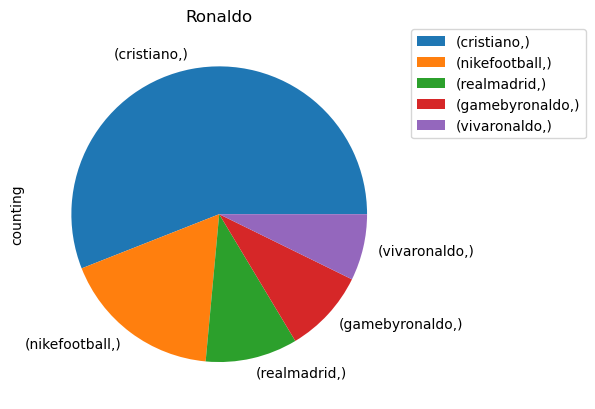

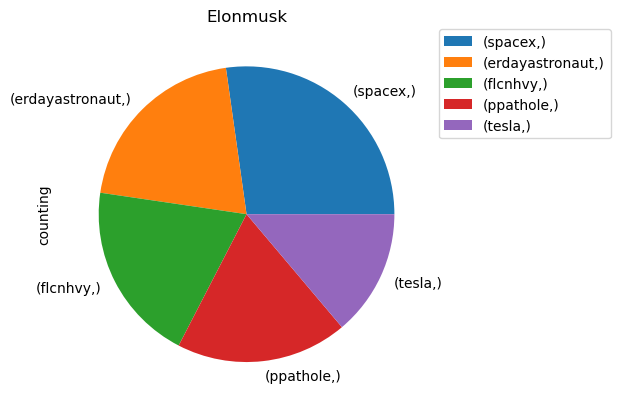

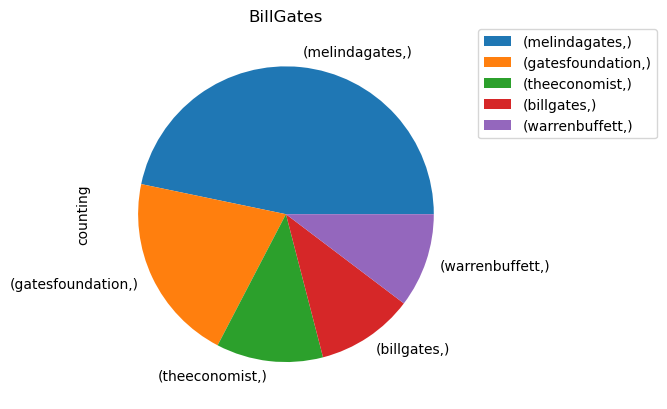

In [147]:
#To analyse the top 5 tagged users from the three users 

def line_bar(data, title):
    data.head(5).plot.pie(subplots=True)
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
line_bar(counting['Ronaldo'], title='Ronaldo')
line_bar(counting['Elonmusk'], title='Elonmusk')
line_bar(counting['BillGates'], title='BillGates')


<font color="red">
I analyse common mentioned user names for 2 user then show the result by by bar chart. 
<font>

In [64]:
#function: A and B common friends
import functools as ft

def common_frd(ppl_a, ppl_b):
    ppl_list = [counting[ppl_a], counting[ppl_b]]
    ppl_df = ft.reduce(lambda  left,right: pd.merge(left,right,on=['mentions'],
                                            how='inner'), ppl_list)
    ppl_df = ppl_df.rename(columns={'counting_x':ppl_a, 'counting_y':ppl_b}).head(5)
    return ppl_df

In [65]:
common_frd('Elonmusk', 'Ronaldo')

,Elonmusk,Ronaldo
mentions,,
kanyewest,7,1
tiesto,1,1


In [66]:
common_frd('BillGates', 'Elonmusk')

,BillGates,Elonmusk
mentions,,
billgates,31,2
sapinker,16,1
nytimes,15,4
wsj,9,2
guardian,6,1


In [67]:
common_frd('BillGates', 'Ronaldo')

,BillGates,Ronaldo
mentions,,
rafaelnadal,2,5
savethechildren,1,20
nike,1,4


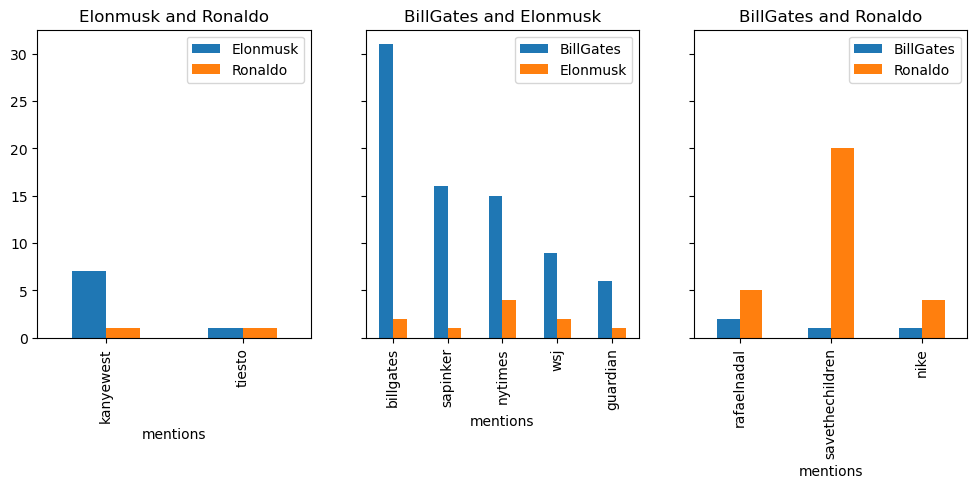

In [68]:
#To analyse the top 5 tagged users from  the three users
fig, axes = plt.subplots(ncols = 3, figsize=(12, 4), sharey=True)    

def line_bar(data, ax, title):
    data.head(5).plot.bar(ax=ax)
    ax.set_title(title)
    
line_bar(common_frd('Elonmusk', 'Ronaldo'), ax=axes[0], title='Elonmusk and Ronaldo')
line_bar(common_frd('BillGates', 'Elonmusk'), ax=axes[1], title='BillGates and Elonmusk')
line_bar(common_frd('BillGates', 'Ronaldo'), ax=axes[2], title='BillGates and Ronaldo')

<font color="red">
It shows BillGates and Elonmusk have the most common friends and mytimes is mentioned by them both the most.
<font>

<font color="red">
I also find the three users' common friend but they do not have common friends. Thus I do not keep analysing.
<font>

In [69]:
#the three users common friends
three_users = [counting['BillGates'], counting['Elonmusk'], counting['Ronaldo']]
three_users_df = ft.reduce(lambda  left,right: pd.merge(left,right,on=['mentions'],
                                            how='inner'), three_users)

In [70]:
three_users_df.head(10)

,counting_x,counting_y,counting
mentions,,,
